# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk

# Exploratory Data Analysis (EDA)

## Understanding Data

In [2]:
# Load the dataset
data = pd.read_csv( "Womens Clothing E-Commerce Reviews.csv")

In [3]:
# Preview the data
print(data.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


## Checking missing values

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
review = data[['Review Text', 'Recommended IND']]
review.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [8]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
review.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [9]:
review.isnull().sum()

Review         845
Recommended      0
dtype: int64

In [10]:
review.dropna(subset=['Review'], inplace=True)

In [11]:
review.isnull().sum()

Review         0
Recommended    0
dtype: int64

## Checking class imbalance

In [12]:
review['Recommended'].value_counts()

1    18540
0     4101
Name: Recommended, dtype: int64

## Exploration

### Visualizations

Text(0.5, 1.0, 'Proportion Target Class')

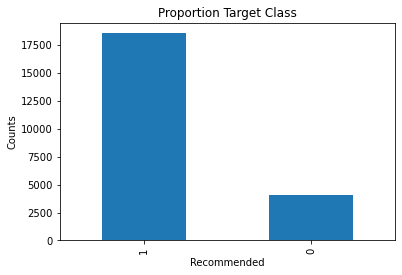

In [13]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

<AxesSubplot:>

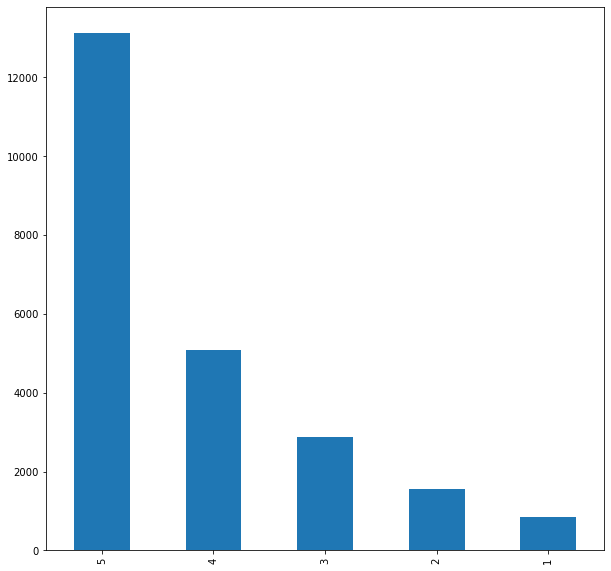

In [15]:
plt.figure(figsize=(10,10))
ax=data.Rating.value_counts()[:10]
ax.plot(kind='bar')

### Pre-processing

In [16]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [17]:
review['Review_clear'] = review['Review'].apply(tokens)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress it s sooo pretty i happened to...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit it s fun flirty...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...


In [18]:
review['Review_clear'] = review['Review_clear'].astype(str)

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [21]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [22]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [23]:
review['Review_clear'] = review['Review_clear'].apply(stopwords)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hopes really wanted work initially ordere...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


In [24]:
import nltk
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lem = WordNetLemmatizer()
def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [25]:
review['Review_clear'] = review['Review_clear'].apply(lemma)
review.head()

,Review,Recommended,Review_clear
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...


# Machine Learning

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X=vec.fit_transform(review['Review_clear'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()
#X = vect.transform(Review_clear)

#len(vect.get_feature_names())

,0,1,2,3,4,5,6,7,8,9,...,12099,12100,12101,12102,12103,12104,12105,12106,12107,12108
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split

y=review['Recommended']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=99)

### Balancing Class

<AxesSubplot:xlabel='Recommended', ylabel='count'>

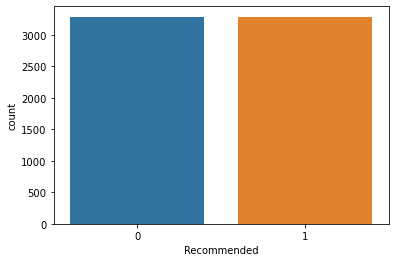

In [28]:
from imblearn.under_sampling import RandomUnderSampler
resampler=RandomUnderSampler(random_state=0)
X_train_US,y_train_US=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_US)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_US,y_train_US)

MultinomialNB()

In [36]:
y_pred=model.predict(X_test)

from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',cm)
print()
print()
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n',result)

accuracy:0.844116


Confusion Matrix: [[ 714   98]
 [ 608 3109]]


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.88      0.67       812
           1       0.97      0.84      0.90      3717

    accuracy                           0.84      4529
   macro avg       0.75      0.86      0.78      4529
weighted avg       0.89      0.84      0.86      4529



# Sentiment Analysis

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()




# We can extract the values from the dictionary and create new columns within our dataframe
review['compound'] = [sentiment.polarity_scores(review) ['compound'] for review in review ['Review_clear']] 
review['neg'] = [sentiment.polarity_scores(review)['neg'] for review in review ['Review_clear' ]] 
review['neu'] = [sentiment.polarity_scores(review)['neu'] for review in review['Review_clear']] 
review['pos'] = [sentiment.polarity_scores(review)['pos'] for review in review['Review_clear']]

In [38]:
review.head()

,Review,Recommended,Review_clear,compound,neg,neu,pos
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable,0.8991,0.000,0.154,0.846
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...,0.9710,0.000,0.480,0.520
2,I had such high hopes for this dress and reall...,0,high hope really wanted work initially ordered...,0.8910,0.040,0.709,0.251
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,0.9437,0.184,0.157,0.658
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...,0.9062,0.000,0.423,0.577


In [39]:
review[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,22641.000000,22641.000000,22641.000000,22641.000000
mean,0.792639,0.049747,0.539567,0.410684
std,0.281204,0.068879,0.152680,0.166110
min,-0.936100,0.000000,0.000000,0.000000
25%,0.771700,0.000000,0.445000,0.299000
50%,0.899900,0.000000,0.546000,0.401000
75%,0.949300,0.083000,0.639000,0.513000
max,0.995700,0.923000,1.000000,1.000000


<AxesSubplot:xlabel='compound', ylabel='Count'>

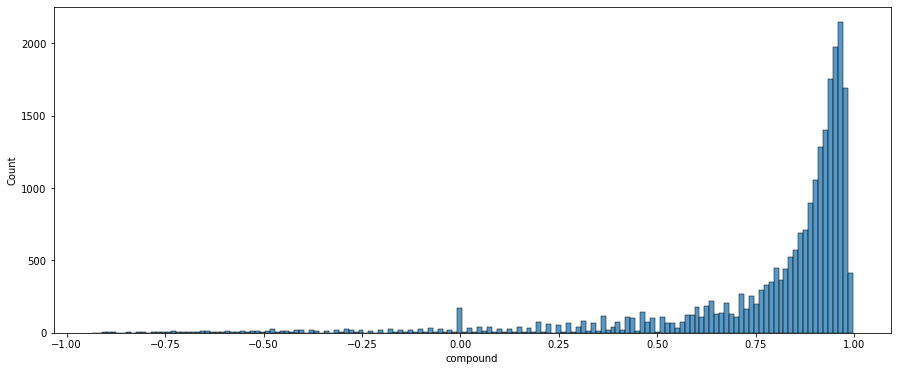

In [40]:
plt.figure(figsize=(15,6))
sns.histplot(review['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

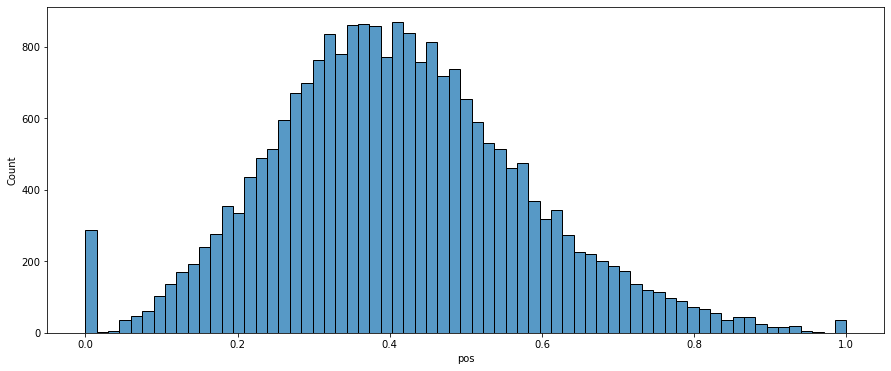

In [41]:
plt.figure(figsize=(15,6))
sns.histplot(review['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

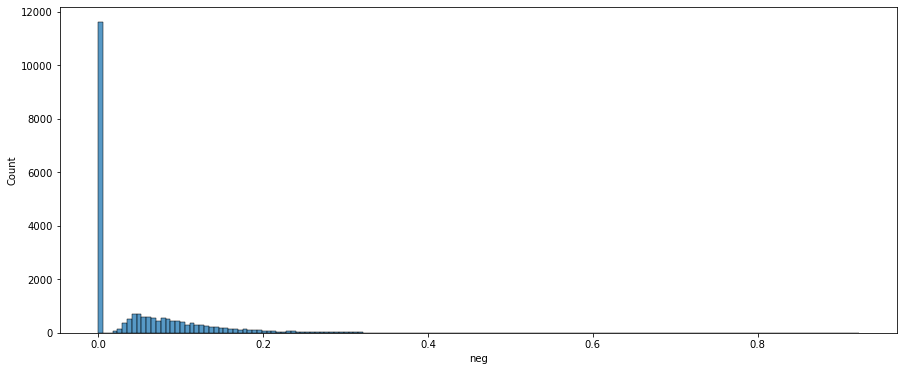

In [42]:
plt.figure(figsize=(15,6))
sns.histplot(review['neg'])

In [43]:
per_neg=pd.DataFrame((review['compound']<=0).groupby(review['Recommended']).sum()/
                     review['Recommended'].groupby(review['Recommended']).count()*100,
                     columns=['%Negative Reviews']).sort_values(by='%Negative Reviews')
per_neg

,%Negative Reviews
Recommended,
1,1.639698
0,13.094367


In [44]:
positive = review[review.Recommended== 1]
negative = review[review.Recommended== 0]
positive.head()

,Review,Recommended,Review_clear,compound,neg,neu,pos
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable,0.8991,0.000,0.154,0.846
1,Love this dress! it's sooo pretty. i happene...,1,love sooo pretty happened find store glad bc n...,0.9710,0.000,0.480,0.520
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...,0.9437,0.184,0.157,0.658
4,This shirt is very flattering to all due to th...,1,flattering due adjustable front tie perfect le...,0.9062,0.000,0.423,0.577
6,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...,0.6361,0.051,0.817,0.132


In [45]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [46]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would tak'

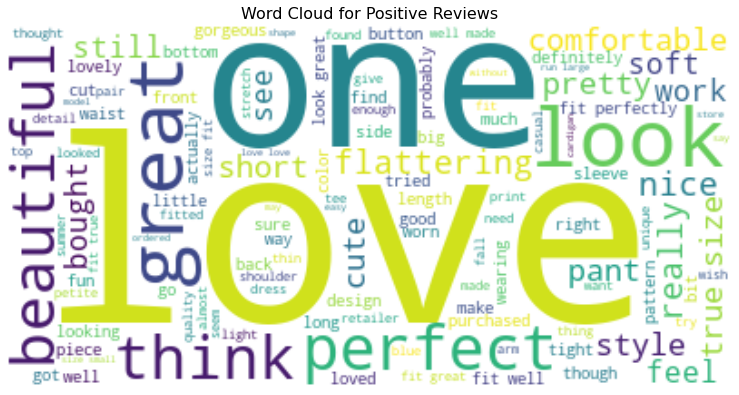

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    background_color="white",
    max_words=len(positive_words)).generate(positive_words)

plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews", fontsize=16)
plt.show()


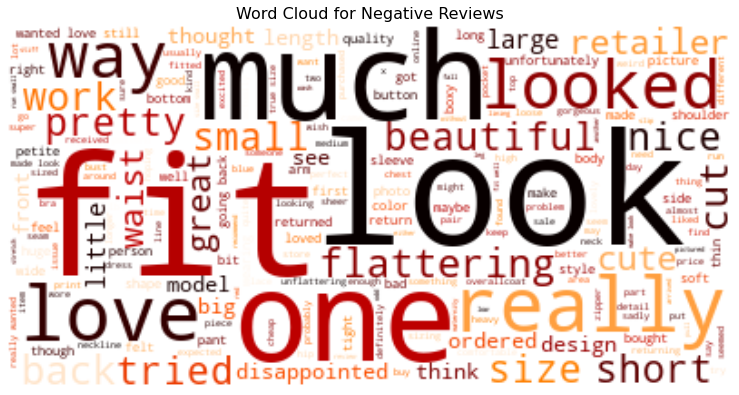

In [48]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews", fontsize=16)
plt.show()